## Calculate GPP from NIRv

In this notebook...

In [1]:
# import libraries
import glob
import os
import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import matplotlib.dates as mdates
import seaborn as sns
from scipy.stats import linregress

In [2]:
# set working directory
os.chdir("E:/Master/Thesis/3_Data")
print("Current working directory: {0}".format(os.getcwd()))

Current working directory: E:\Master\Thesis\3_Data


In [3]:
# get spatial means for Germany for NIRv
# first, get values for broadleaved forest
# load all monthly gpp values as one dataset
directory = f"./NIRv/Monthly"
filelist = glob.glob(os.path.join(directory, "*BL*.nc"))
nirv_monthly_BL = xr.open_mfdataset(filelist, concat_dim="time", combine="nested", engine="netcdf4")

In [4]:
# now, the same for needleleaved forest
# load all monthly gpp values as one dataset
directory = f"./NIRv/Monthly"
filelist = glob.glob(os.path.join(directory, "*NL*.nc"))
nirv_monthly_NL = xr.open_mfdataset(filelist, concat_dim="time", combine="nested", engine="netcdf4")

In [5]:
# calculate mean NIRv values per month for Germany
nirv_monthly_spatial_means_BL = nirv_monthly_BL.mean(['lon','lat'], skipna=True).to_dataframe()
nirv_monthly_spatial_means_NL = nirv_monthly_NL.mean(['lon','lat'], skipna=True).to_dataframe()
nirv_monthly_spatial_means_BL

,NIRv,crs,spatial_ref
time,,,
1981-06-01,0.174200,0,0
1981-07-01,0.152914,0,0
1981-08-01,0.113898,0,0
1981-09-01,0.119536,0,0
1981-10-01,0.084218,0,0
...,...,...,...
2024-08-01,0.240347,-127,0
2024-09-01,0.216595,-127,0
2024-10-01,0.155714,-127,0


In [6]:
# drop unneeded columns
nirv_monthly_spatial_means_BL = nirv_monthly_spatial_means_BL.drop(['crs', 'spatial_ref'], axis=1)
nirv_monthly_spatial_means_NL = nirv_monthly_spatial_means_NL.drop(['crs', 'spatial_ref'], axis=1)

In [7]:
# rename column with gpp value to show area
nirv_monthly_spatial_means_BL.rename({"NIRv":"GER"}, axis=1, inplace=True)
nirv_monthly_spatial_means_NL.rename({"NIRv":"GER"}, axis=1, inplace=True)

In [8]:
# turn index with time values into column
nirv_monthly_spatial_means_BL = nirv_monthly_spatial_means_BL.reset_index()
nirv_monthly_spatial_means_NL = nirv_monthly_spatial_means_NL.reset_index()

In [9]:
# convert the time values to pandas datetime
nirv_monthly_spatial_means_BL["time"] = pd.to_datetime(nirv_monthly_spatial_means_BL["time"])
nirv_monthly_spatial_means_NL["time"] = pd.to_datetime(nirv_monthly_spatial_means_NL["time"])

In [10]:
nirv_monthly_spatial_means_BL

,time,GER
0,1981-06-01,0.174200
1,1981-07-01,0.152914
2,1981-08-01,0.113898
3,1981-09-01,0.119536
4,1981-10-01,0.084218
...,...,...
517,2024-08-01,0.240347
518,2024-09-01,0.216595
519,2024-10-01,0.155714
520,2024-11-01,0.103326


In [11]:
# load spatial means for Germany for MODIS and VOCDCA2 GPP
gpp_modis_BL = pd.read_csv("./Tables/Spatial_Means/GPP_MODIS_Monthly_Spatial_Means_BL.csv")
gpp_modis_NL = pd.read_csv("./Tables/Spatial_Means/GPP_MODIS_Monthly_Spatial_Means_NL.csv")
gpp_vodca_BL = pd.read_csv("./Tables/Spatial_Means/GPP_VODCA2_Monthly_Spatial_Means_BL.csv")
gpp_vodca_NL = pd.read_csv("./Tables/Spatial_Means/GPP_VODCA2_Monthly_Spatial_Means_NL.csv")

In [12]:
# convert the time values to pandas datetime
gpp_modis_BL["time"] = pd.to_datetime(gpp_modis_BL["time"])
gpp_modis_NL["time"] = pd.to_datetime(gpp_modis_NL["time"])
gpp_vodca_BL["time"] = pd.to_datetime(gpp_vodca_BL["time"])
gpp_vodca_NL["time"] = pd.to_datetime(gpp_vodca_NL["time"])

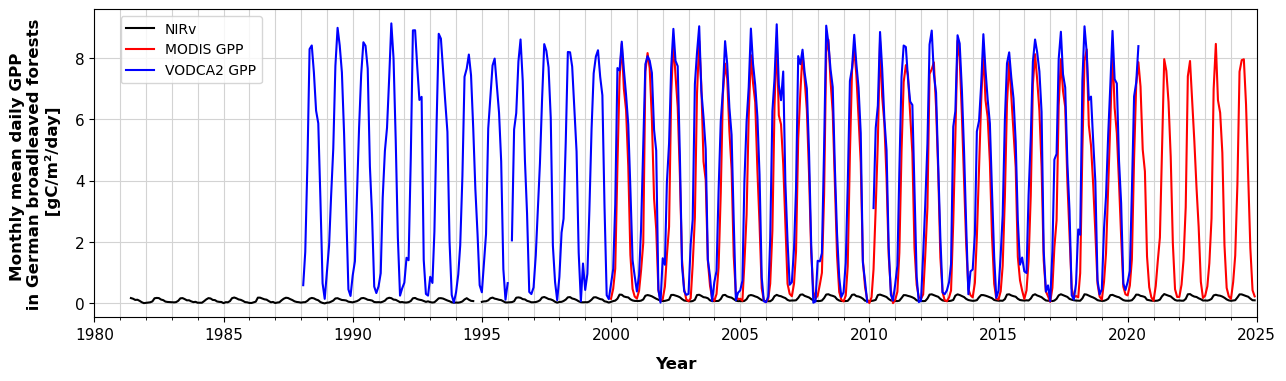

In [13]:
# plot spatial means for BL forest
fig, ax = plt.subplots(figsize=(15,4))
ax.plot('time', 'GER', data=nirv_monthly_spatial_means_BL, color='black', linewidth=1.5, linestyle='-', label="NIRv")
ax.plot('time', 'GER', data=gpp_modis_BL, color='red', linewidth=1.5, linestyle='-', label="MODIS GPP")
ax.plot('time', 'GER', data=gpp_vodca_BL, color='blue', linewidth=1.5, linestyle='-', label="VODCA2 GPP")
ax.xaxis.set_major_locator(mdates.YearLocator(5))
ax.xaxis.set_minor_locator(mdates.YearLocator(1))
ax.tick_params(axis='both', labelsize=11)
ax.set_ylabel('Monthly mean daily GPP \n in German broadleaved forests \n [gC/m²/day]', fontsize=12, weight='bold', labelpad=10)
ax.set_xlabel('Year', fontsize=12, weight='bold', labelpad=10)
ax.set_xlim(datetime(1980, 1, 1), datetime(2025, 1, 1))
ax.grid(True, which='both', color='lightgrey')
ax.legend(loc=1, fontsize=10,  bbox_to_anchor=(0.15, 1), ncol = 1)

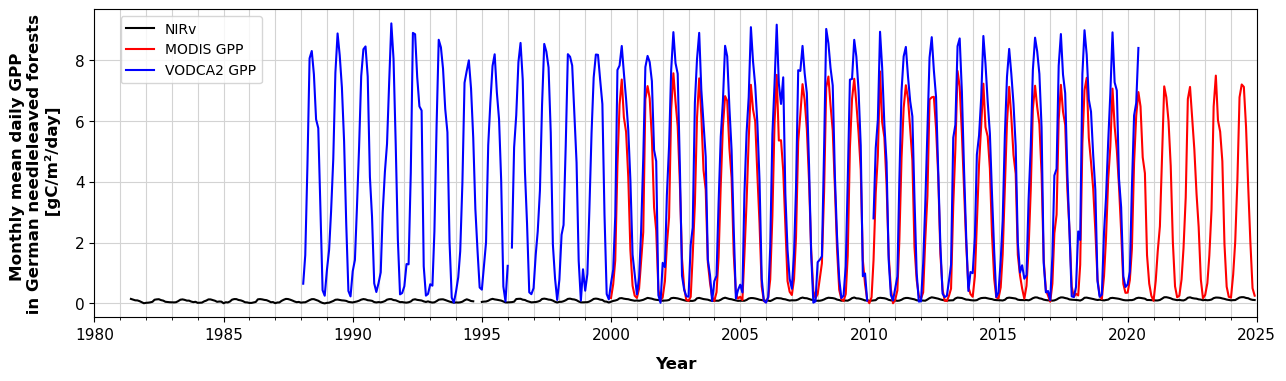

In [14]:
# plot spatial means for NL forest
fig, ax = plt.subplots(figsize=(15,4))
ax.plot('time', 'GER', data=nirv_monthly_spatial_means_NL, color='black', linewidth=1.5, linestyle='-', label="NIRv")
ax.plot('time', 'GER', data=gpp_modis_NL, color='red', linewidth=1.5, linestyle='-', label="MODIS GPP")
ax.plot('time', 'GER', data=gpp_vodca_NL, color='blue', linewidth=1.5, linestyle='-', label="VODCA2 GPP")
ax.xaxis.set_major_locator(mdates.YearLocator(5))
ax.xaxis.set_minor_locator(mdates.YearLocator(1))
ax.tick_params(axis='both', labelsize=11)
ax.set_ylabel('Monthly mean daily GPP \n in German needleleaved forests \n [gC/m²/day]', fontsize=12, weight='bold', labelpad=10)
ax.set_xlabel('Year', fontsize=12, weight='bold', labelpad=10)
ax.set_xlim(datetime(1980, 1, 1), datetime(2025, 1, 1))
ax.grid(True, which='both', color='lightgrey')
ax.legend(loc=1, fontsize=10,  bbox_to_anchor=(0.15, 1), ncol = 1)

In [15]:
# merge datasets into one dataframe with common time values to create scatterplots
df_nirv_modis_BL = pd.merge(
    nirv_monthly_spatial_means_BL[['time', 'GER']],
    gpp_modis_BL[['time', 'GER']],
    on='time',
    suffixes=('_NIRv', '_MODIS'))
df_nirv_modis_BL.rename(columns = {"GER_NIRv" : "NIRv", "GER_MODIS" : "MODIS GPP"}, inplace = True)
df_nirv_modis_BL

,time,NIRv,MODIS GPP
0,2000-02-01,0.074901,0.480098
1,2000-03-01,0.090748,1.134153
2,2000-04-01,0.152040,4.493022
3,2000-05-01,0.286408,7.337403
4,2000-06-01,0.281401,8.465317
...,...,...,...
294,2024-08-01,0.240347,6.482536
295,2024-09-01,0.216595,4.049793
296,2024-10-01,0.155714,1.796794
297,2024-11-01,0.103326,0.428716


In [16]:
df_nirv_modis_NL = pd.merge(
    nirv_monthly_spatial_means_NL[['time', 'GER']],
    gpp_modis_NL[['time', 'GER']],
    on='time',
    suffixes=('_NIRv', '_MODIS'))
df_nirv_modis_NL.rename(columns = {"GER_NIRv" : "NIRv", "GER_MODIS" : "MODIS GPP"}, inplace = True)

In [17]:
df_nirv_vodca_BL = pd.merge(
    nirv_monthly_spatial_means_BL[['time', 'GER']],
    gpp_vodca_BL[['time', 'GER']],
    on='time',
    suffixes=('_NIRv', '_VODCA2'))
df_nirv_vodca_BL.rename(columns = {"GER_NIRv" : "NIRv", "GER_VODCA2" : "VODCA2 GPP"}, inplace = True)

In [18]:
df_nirv_vodca_NL = pd.merge(
    nirv_monthly_spatial_means_NL[['time', 'GER']],
    gpp_vodca_NL[['time', 'GER']],
    on='time',
    suffixes=('_NIRv', '_VODCA2'))
df_nirv_vodca_NL.rename(columns = {"GER_NIRv" : "NIRv", "GER_VODCA2" : "VODCA2 GPP"}, inplace = True)

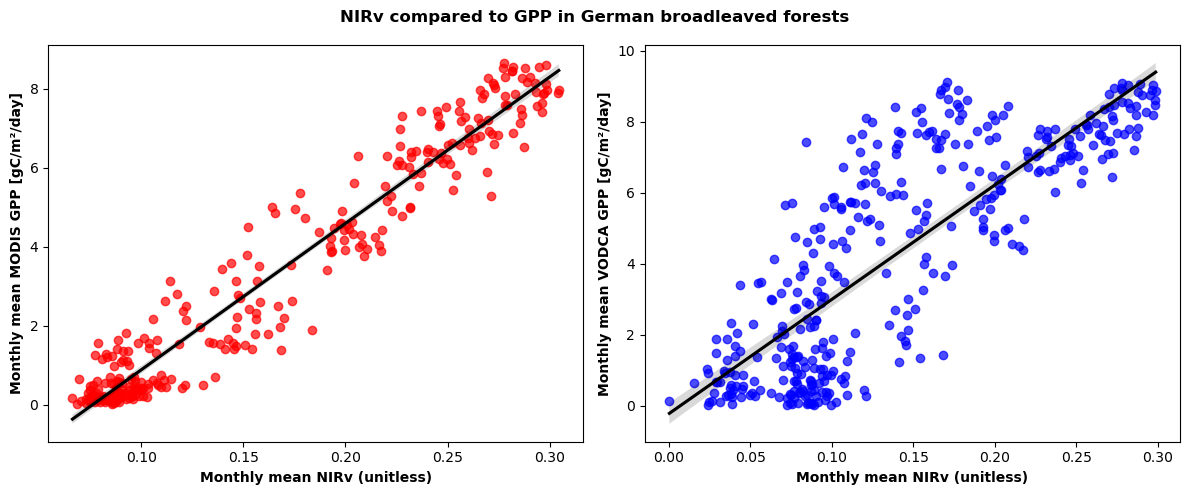

In [19]:
# create scatterplots for BL forest
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# NIRv vs MODIS
sns.regplot(x = "NIRv", y = "MODIS GPP", data = df_nirv_modis_BL, ax = ax1, scatter_kws={"alpha":0.7, "color":"red"}, line_kws={"color":"black"})
ax1.set_xlabel('Monthly mean NIRv (unitless)', weight = "bold")
ax1.set_ylabel('Monthly mean MODIS GPP [gC/m²/day]', weight = "bold")

# NIRv vs VODCA
sns.regplot(x = "NIRv", y = "VODCA2 GPP", data = df_nirv_vodca_BL, ax = ax2, scatter_kws={"alpha":0.7, "color":"blue"}, line_kws={"color":"black"})
ax2.set_xlabel('Monthly mean NIRv (unitless)', weight = "bold")
ax2.set_ylabel('Monthly mean VODCA GPP [gC/m²/day]', weight = "bold")

plt.suptitle("NIRv compared to GPP in German broadleaved forests", weight = "bold")
plt.tight_layout()
plt.show()

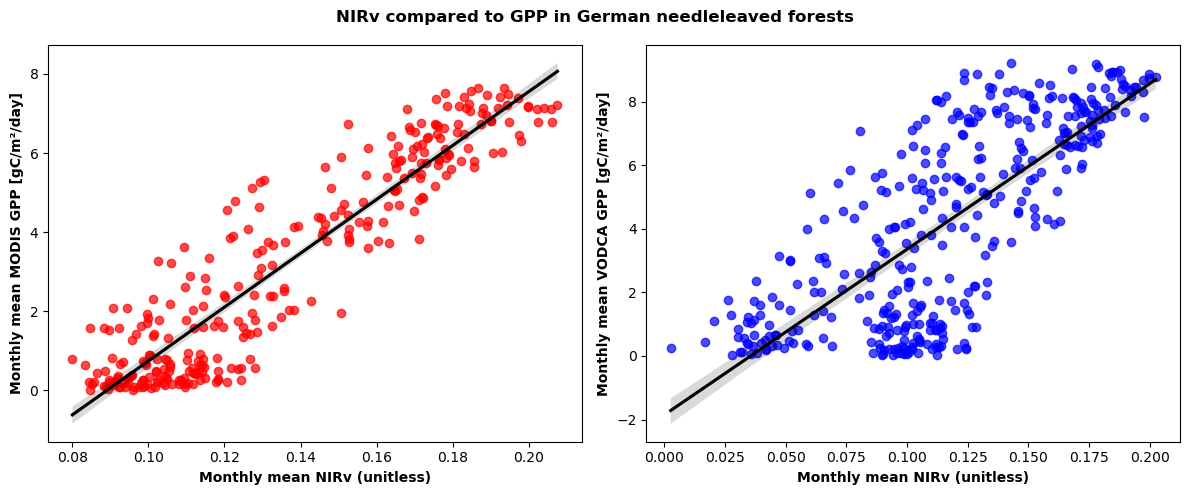

In [20]:
# create scatterplots for NL forest
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# NIRv vs MODIS
sns.regplot(x = "NIRv", y = "MODIS GPP", data = df_nirv_modis_NL, ax = ax1, scatter_kws={"alpha":0.7, "color":"red"}, line_kws={"color":"black"})
ax1.set_xlabel('Monthly mean NIRv (unitless)', weight = "bold")
ax1.set_ylabel('Monthly mean MODIS GPP [gC/m²/day]', weight = "bold")

# NIRv vs VODCA
sns.regplot(x = "NIRv", y = "VODCA2 GPP", data = df_nirv_vodca_NL, ax = ax2, scatter_kws={"alpha":0.7, "color":"blue"}, line_kws={"color":"black"})
ax2.set_xlabel('Monthly mean NIRv (unitless)', weight = "bold")
ax2.set_ylabel('Monthly mean VODCA GPP [gC/m²/day]', weight = "bold")

plt.suptitle("NIRv compared to GPP in German needleleaved forests", weight = "bold")
plt.tight_layout()
plt.show()

In [21]:
# divide modis and vodca gpp by nirv to determine alpha value
df_nirv_modis_BL["Quotient"] = df_nirv_modis_BL["MODIS GPP"] / df_nirv_modis_BL["NIRv"]
df_nirv_modis_NL["Quotient"] = df_nirv_modis_NL["MODIS GPP"] / df_nirv_modis_NL["NIRv"]
df_nirv_vodca_BL["Quotient"] = df_nirv_vodca_BL["VODCA2 GPP"] / df_nirv_vodca_BL["NIRv"]
df_nirv_vodca_NL["Quotient"] = df_nirv_vodca_NL["VODCA2 GPP"] / df_nirv_vodca_NL["NIRv"]

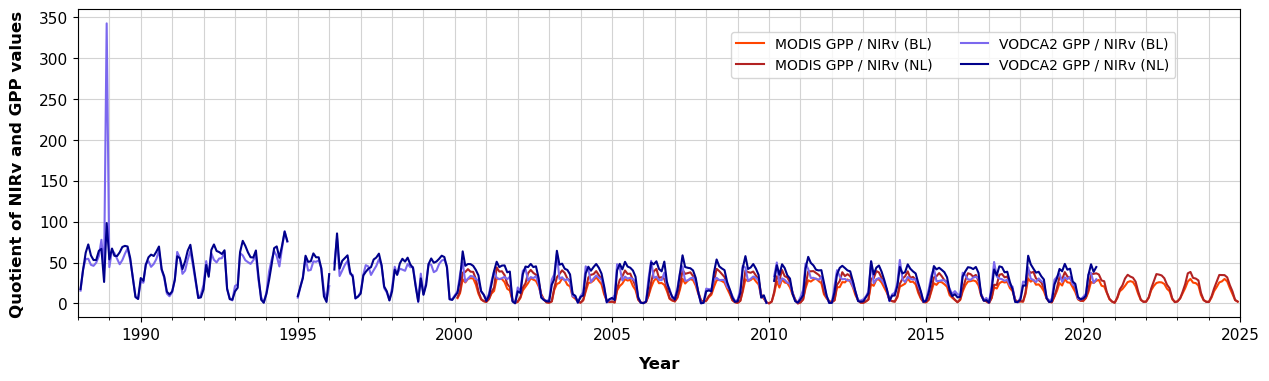

In [22]:
# plot result
fig, ax = plt.subplots(figsize=(15,4))
ax.plot('time', 'Quotient', data=df_nirv_modis_BL, color='orangered', linewidth=1.5, linestyle='-', label="MODIS GPP / NIRv (BL)")
ax.plot('time', 'Quotient', data=df_nirv_modis_NL, color='firebrick', linewidth=1.5, linestyle='-', label="MODIS GPP / NIRv (NL)")
ax.plot('time', 'Quotient', data=df_nirv_vodca_BL, color='mediumslateblue', linewidth=1.5, linestyle='-', label="VODCA2 GPP / NIRv (BL)")
ax.plot('time', 'Quotient', data=df_nirv_vodca_NL, color='darkblue', linewidth=1.5, linestyle='-', label="VODCA2 GPP / NIRv (NL)")
ax.xaxis.set_major_locator(mdates.YearLocator(5))
ax.xaxis.set_minor_locator(mdates.YearLocator(1))
ax.tick_params(axis='both', labelsize=11)
ax.set_ylabel('Quotient of NIRv and GPP values', fontsize=12, weight='bold', labelpad=10)
ax.set_xlabel('Year', fontsize=12, weight='bold', labelpad=10)
ax.set_xlim(datetime(1988, 1, 1), datetime(2025, 1, 1))
ax.grid(True, which='both', color='lightgrey')
ax.legend(loc=1, fontsize=10,  bbox_to_anchor=(0.95, 0.95), ncol = 2)

In [23]:
# have a look at extreme value in 1988
df_1988 = df_nirv_vodca_BL[df_nirv_vodca_BL['time'].dt.year == 1988]
df_1988

,time,NIRv,VODCA2 GPP,Quotient
0,1988-02-01,0.037917,0.593664,15.656948
1,1988-03-01,0.040460,1.679584,41.511774
2,1988-04-01,0.084846,4.614831,54.390837
3,1988-05-01,0.151773,8.291438,54.630549
4,1988-06-01,0.178094,8.409732,47.220673
5,1988-07-01,0.163776,7.531046,45.983737
6,1988-08-01,0.126232,6.284969,49.788887
7,1988-09-01,0.101399,5.872765,57.917179
8,1988-10-01,0.043940,3.420233,77.838052
9,1988-11-01,0.015512,0.654740,42.208745


In [24]:
# plot again without value of December 1988
exclude_time = datetime(1988, 12, 1)
df_nirv_vodca_BL_filtered = df_nirv_vodca_BL[df_nirv_vodca_BL['time'] != exclude_time]

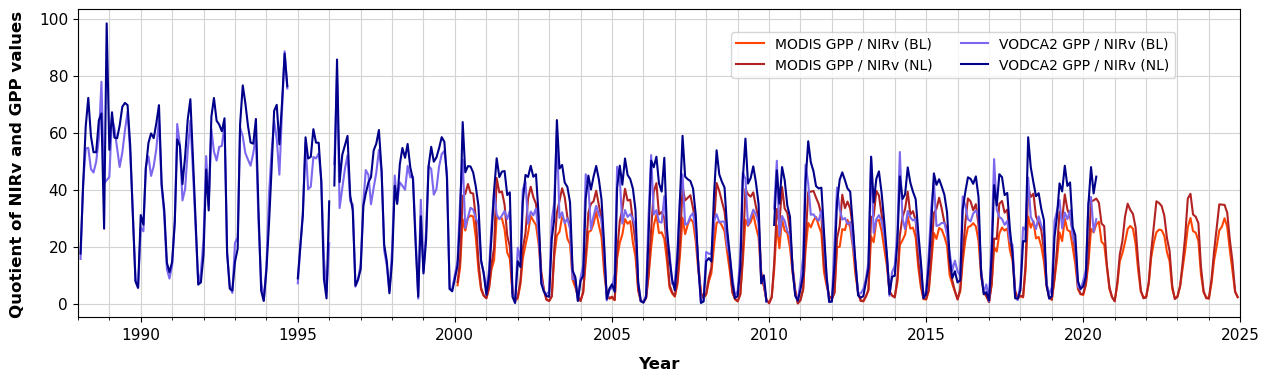

In [25]:
fig, ax = plt.subplots(figsize=(15,4))
ax.plot('time', 'Quotient', data=df_nirv_modis_BL, color='orangered', linewidth=1.5, linestyle='-', label="MODIS GPP / NIRv (BL)")
ax.plot('time', 'Quotient', data=df_nirv_modis_NL, color='firebrick', linewidth=1.5, linestyle='-', label="MODIS GPP / NIRv (NL)")
ax.plot('time', 'Quotient', data=df_nirv_vodca_BL_filtered, color='mediumslateblue', linewidth=1.5, linestyle='-', label="VODCA2 GPP / NIRv (BL)")
ax.plot('time', 'Quotient', data=df_nirv_vodca_NL, color='darkblue', linewidth=1.5, linestyle='-', label="VODCA2 GPP / NIRv (NL)")
ax.xaxis.set_major_locator(mdates.YearLocator(5))
ax.xaxis.set_minor_locator(mdates.YearLocator(1))
ax.tick_params(axis='both', labelsize=11)
ax.set_ylabel('Quotient of NIRv and GPP values', fontsize=12, weight='bold', labelpad=10)
ax.set_xlabel('Year', fontsize=12, weight='bold', labelpad=10)
ax.set_xlim(datetime(1988, 1, 1), datetime(2025, 1, 1))
ax.grid(True, which='both', color='lightgrey')
ax.legend(loc=1, fontsize=10,  bbox_to_anchor=(0.95, 0.95), ncol = 2)

In [26]:
# look at the means of the quotients
print(f"Mean of the quotient NIRv / MODIS GPP (BL forest): {df_nirv_modis_BL["Quotient"].mean()}")
print(f"Mean of the quotient NIRv / MODIS GPP (NL forest): {df_nirv_modis_NL["Quotient"].mean()}")
print(f"Mean of the quotient NIRv / VODCA2 GPP (BL forest): {df_nirv_vodca_BL["Quotient"].mean()}")
print(f"Mean of the quotient NIRv / VODCA2 GPP (BL forest, filtered): {df_nirv_vodca_BL_filtered["Quotient"].mean()}")
print(f"Mean of the quotient NIRv / VODCA2 GPP (NL forest): {df_nirv_vodca_NL["Quotient"].mean()}")

Mean of the quotient NIRv / MODIS GPP (BL forest): 16.04817960581371
Mean of the quotient NIRv / MODIS GPP (NL forest): 20.50313315415054
Mean of the quotient NIRv / VODCA2 GPP (BL forest): 30.0942554410431
Mean of the quotient NIRv / VODCA2 GPP (BL forest, filtered): 29.274346868303226
Mean of the quotient NIRv / VODCA2 GPP (NL forest): 33.827937140715584


In [27]:
# NEW APPROACH
# normalize time series: calculate means of GPP and NIRv time series, subtract their mean value from time series
# from now on, working with MODIS GPP because the relationship between MODIS GPP and NIRv seems stronger based on the scatterplots
# first, calculate means of each time series
modis_BL_mean = df_nirv_modis_BL["MODIS GPP"].mean()
print(f"Mean of the MODIS GPP time series (BL forest): {modis_BL_mean}")

nirv_BL_mean = df_nirv_modis_BL["NIRv"].mean()
print(f"Mean of the NIRv time series (BL forest): {nirv_BL_mean}")

modis_NL_mean = df_nirv_modis_NL["MODIS GPP"].mean()
print(f"Mean of the MODIS GPP time series (NL forest): {modis_NL_mean}")

nirv_NL_mean = df_nirv_modis_NL["NIRv"].mean()
print(f"Mean of the NIRv time series (NL forest): {nirv_NL_mean}")

Mean of the MODIS GPP time series (BL forest): 3.3677629479313205
Mean of the NIRv time series (BL forest): 0.166894719034414
Mean of the MODIS GPP time series (NL forest): 3.194330000360419
Mean of the NIRv time series (NL forest): 0.1360059733873881


In [28]:
# then, subtract the mean values from the original time series to recieve normalized values
df_nirv_modis_BL_norm = pd.DataFrame({"time": df_nirv_modis_BL["time"], 
                                      "NIRv": df_nirv_modis_BL["NIRv"] - nirv_BL_mean,
                                      "MODIS GPP": df_nirv_modis_BL["MODIS GPP"] - modis_BL_mean})

df_nirv_modis_NL_norm = pd.DataFrame({"time": df_nirv_modis_NL["time"],
                                      "NIRv": df_nirv_modis_NL["NIRv"] - nirv_NL_mean,
                                      "MODIS GPP": df_nirv_modis_NL["MODIS GPP"] - modis_NL_mean})

In [29]:
# see if means of normalized time series match
modis_BL_norm_mean = df_nirv_modis_BL_norm["MODIS GPP"].mean()
print(f"Mean of the normalized MODIS GPP time series (BL forest): {modis_BL_norm_mean:.10f}")

nirv_BL_norm_mean = df_nirv_modis_BL_norm["NIRv"].mean()
print(f"Mean of the normalized NIRv time series (BL forest): {nirv_BL_norm_mean:.10f}")

modis_NL_norm_mean = df_nirv_modis_NL_norm["MODIS GPP"].mean()
print(f"Mean of the normalized MODIS GPP time series (NL forest): {modis_NL_norm_mean:.10f}")

nirv_NL_norm_mean = df_nirv_modis_NL_norm["NIRv"].mean()
print(f"Mean of the normalized NIRv time series (NL forest): {nirv_NL_norm_mean:.10f}")

Mean of the normalized MODIS GPP time series (BL forest): -0.0000000000
Mean of the normalized NIRv time series (BL forest): 0.0000000000
Mean of the normalized MODIS GPP time series (NL forest): 0.0000000000
Mean of the normalized NIRv time series (NL forest): -0.0000000000


In [30]:
# divide GPP by NIRv to determine alpha value
df_nirv_modis_BL_norm["Quotient"] = df_nirv_modis_BL_norm["MODIS GPP"] / df_nirv_modis_BL_norm["NIRv"]
df_nirv_modis_NL_norm["Quotient"] = df_nirv_modis_NL_norm["MODIS GPP"] / df_nirv_modis_NL_norm["NIRv"]

In [31]:
df_nirv_modis_BL_norm

,time,NIRv,MODIS GPP,Quotient
0,2000-02-01,-0.091994,-2.887665,31.389735
1,2000-03-01,-0.076147,-2.233610,29.332916
2,2000-04-01,-0.014854,1.125259,-75.753069
3,2000-05-01,0.119513,3.969640,33.215003
4,2000-06-01,0.114507,5.097554,44.517588
...,...,...,...,...
294,2024-08-01,0.073452,3.114773,42.405342
295,2024-09-01,0.049700,0.682030,13.722875
296,2024-10-01,-0.011181,-1.570969,140.507892
297,2024-11-01,-0.063569,-2.939047,46.233994


In [32]:
df_nirv_modis_NL_norm

,time,NIRv,MODIS GPP,Quotient
0,2000-02-01,-0.052521,-2.564081,48.820232
1,2000-03-01,-0.039246,-1.779486,45.341378
2,2000-04-01,-0.015407,1.358061,-88.146565
3,2000-05-01,0.033967,3.345416,98.491494
4,2000-06-01,0.039622,4.173424,105.329702
...,...,...,...,...
294,2024-08-01,0.046051,2.614605,56.776151
295,2024-09-01,0.035070,0.624001,17.793033
296,2024-10-01,0.001041,-1.158728,-1113.117929
297,2024-11-01,-0.017620,-2.693355,152.860902


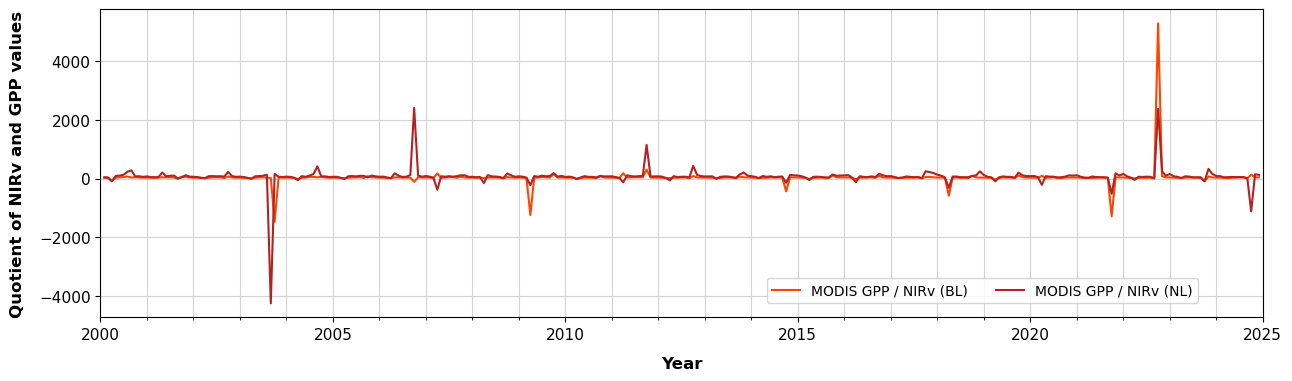

In [33]:
# plot result
fig, ax = plt.subplots(figsize=(15,4))
ax.plot('time', 'Quotient', data=df_nirv_modis_BL_norm, color='orangered', linewidth=1.5, linestyle='-', label="MODIS GPP / NIRv (BL)")
ax.plot('time', 'Quotient', data=df_nirv_modis_NL_norm, color='firebrick', linewidth=1.5, linestyle='-', label="MODIS GPP / NIRv (NL)")
ax.xaxis.set_major_locator(mdates.YearLocator(5))
ax.xaxis.set_minor_locator(mdates.YearLocator(1))
ax.tick_params(axis='both', labelsize=11)
ax.set_ylabel('Quotient of NIRv and GPP values', fontsize=12, weight='bold', labelpad=10)
ax.set_xlabel('Year', fontsize=12, weight='bold', labelpad=10)
ax.set_xlim(datetime(2000, 1, 1), datetime(2025, 1, 1))
ax.grid(True, which='both', color='lightgrey')
ax.legend(loc=1, fontsize=10,  bbox_to_anchor=(0.95, 0.15), ncol = 2)

In [34]:
# filter all values over 100 and under 0 and plot again
df_nirv_modis_BL_norm_filtered = df_nirv_modis_BL_norm[(df_nirv_modis_BL_norm['Quotient'] >= 0) & (df_nirv_modis_BL_norm['Quotient'] <= 100)]
df_nirv_modis_NL_norm_filtered = df_nirv_modis_NL_norm[(df_nirv_modis_NL_norm['Quotient'] >= 0) & (df_nirv_modis_NL_norm['Quotient'] <= 100)]

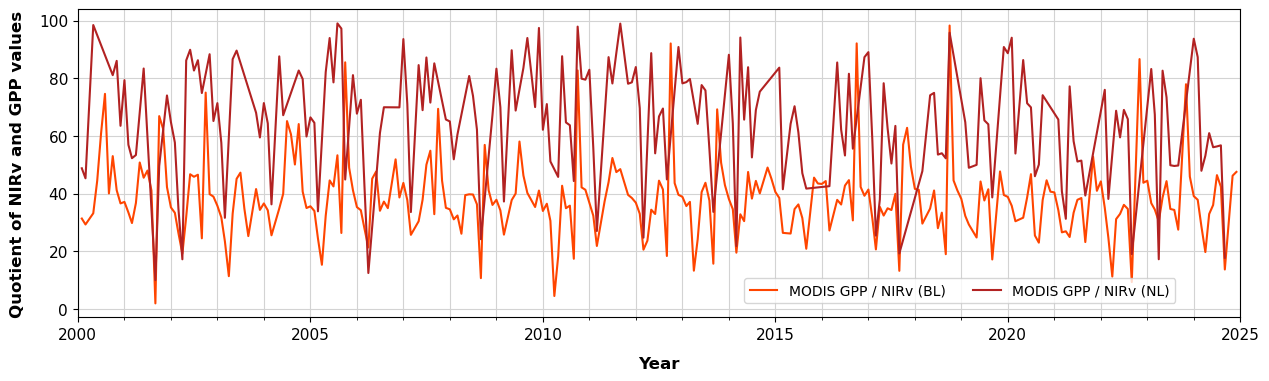

In [35]:
fig, ax = plt.subplots(figsize=(15,4))
ax.plot('time', 'Quotient', data=df_nirv_modis_BL_norm_filtered, color='orangered', linewidth=1.5, linestyle='-', label="MODIS GPP / NIRv (BL)")
ax.plot('time', 'Quotient', data=df_nirv_modis_NL_norm_filtered, color='firebrick', linewidth=1.5, linestyle='-', label="MODIS GPP / NIRv (NL)")
ax.xaxis.set_major_locator(mdates.YearLocator(5))
ax.xaxis.set_minor_locator(mdates.YearLocator(1))
ax.tick_params(axis='both', labelsize=11)
ax.set_ylabel('Quotient of NIRv and GPP values', fontsize=12, weight='bold', labelpad=10)
ax.set_xlabel('Year', fontsize=12, weight='bold', labelpad=10)
ax.set_xlim(datetime(2000, 1, 1), datetime(2025, 1, 1))
ax.grid(True, which='both', color='lightgrey')
ax.legend(loc=1, fontsize=10,  bbox_to_anchor=(0.95, 0.15), ncol = 2)

In [36]:
# look at the means of the quotients
print(f"Mean of the quotient NIRv / MODIS GPP (normalized, filtered, BL forest): {df_nirv_modis_BL_norm_filtered["Quotient"].mean()}")
print(f"Mean of the quotient NIRv / MODIS GPP (normalized, filtered, NL forest): {df_nirv_modis_NL_norm_filtered["Quotient"].mean()}")

Mean of the quotient NIRv / MODIS GPP (normalized, filtered, BL forest): 38.40053303187967
Mean of the quotient NIRv / MODIS GPP (normalized, filtered, NL forest): 65.24285689801704


In [ ]:
# DIFFERENT APPROACH: shift NIRv time series -> add constant to match NIRv mean to GPP mean
# reminder: these are the means of the original time series (not normalized)
modis_BL_mean = df_nirv_modis_BL["MODIS GPP"].mean()
print(f"Mean of the MODIS GPP time series (BL forest): {modis_BL_mean}")

nirv_BL_mean = df_nirv_modis_BL["NIRv"].mean()
print(f"Mean of the NIRv time series (BL forest): {nirv_BL_mean}")

modis_NL_mean = df_nirv_modis_NL["MODIS GPP"].mean()
print(f"Mean of the MODIS GPP time series (NL forest): {modis_NL_mean}")

nirv_NL_mean = df_nirv_modis_NL["NIRv"].mean()
print(f"Mean of the NIRv time series (NL forest): {nirv_NL_mean}")

Mean of the MODIS GPP time series (BL forest): 3.3677629479313205
Mean of the NIRv time series (BL forest): 0.166894719034414
Mean of the MODIS GPP time series (NL forest): 3.194330000360419
Mean of the NIRv time series (NL forest): 0.1360059733873881


In [38]:
# calculate differences between mean values
diff_BL = modis_BL_mean - nirv_BL_mean
print(f"Difference of the MODIS GPP time series mean and the NIRv time series mean (BL forest): {diff_BL}")

diff_NL = modis_NL_mean - nirv_NL_mean
print(f"Difference of the MODIS GPP time series mean and the NIRv time series mean (NL forest): {diff_NL}")

Difference of the MODIS GPP time series mean and the NIRv time series mean (BL forest): 3.2008682288969066
Difference of the MODIS GPP time series mean and the NIRv time series mean (NL forest): 3.058324026973031


In [39]:
# add difference of means to NIRv time series
df_nirv_modis_BL_shift = pd.DataFrame({"time": df_nirv_modis_BL["time"], 
                                      "NIRv": df_nirv_modis_BL["NIRv"] + diff_BL,
                                      "MODIS GPP": df_nirv_modis_BL["MODIS GPP"]})

df_nirv_modis_NL_shift = pd.DataFrame({"time": df_nirv_modis_NL["time"],
                                      "NIRv": df_nirv_modis_NL["NIRv"] + diff_NL,
                                      "MODIS GPP": df_nirv_modis_NL["MODIS GPP"]})

In [40]:
# divide GPP by shifted NIRv to determine alpha value
df_nirv_modis_BL_shift["Quotient"] = df_nirv_modis_BL_shift["MODIS GPP"] / df_nirv_modis_BL_shift["NIRv"]
df_nirv_modis_NL_shift["Quotient"] = df_nirv_modis_NL_shift["MODIS GPP"] / df_nirv_modis_NL_shift["NIRv"]

In [41]:
df_nirv_modis_BL_shift

,time,NIRv,MODIS GPP,Quotient
0,2000-02-01,3.275769,0.480098,0.146560
1,2000-03-01,3.291616,1.134153,0.344558
2,2000-04-01,3.352909,4.493022,1.340037
3,2000-05-01,3.487276,7.337403,2.104050
4,2000-06-01,3.482269,8.465317,2.430977
...,...,...,...,...
294,2024-08-01,3.441215,6.482536,1.883793
295,2024-09-01,3.417463,4.049793,1.185029
296,2024-10-01,3.356582,1.796794,0.535305
297,2024-11-01,3.304194,0.428716,0.129749


In [42]:
df_nirv_modis_NL_shift

,time,NIRv,MODIS GPP,Quotient
0,2000-02-01,3.141809,0.630249,0.200601
1,2000-03-01,3.155084,1.414844,0.448433
2,2000-04-01,3.178923,4.552391,1.432054
3,2000-05-01,3.228297,6.539746,2.025757
4,2000-06-01,3.233952,7.367754,2.278250
...,...,...,...,...
294,2024-08-01,3.240381,5.808935,1.792670
295,2024-09-01,3.229400,3.818331,1.182365
296,2024-10-01,3.195371,2.035602,0.637047
297,2024-11-01,3.176710,0.500975,0.157702


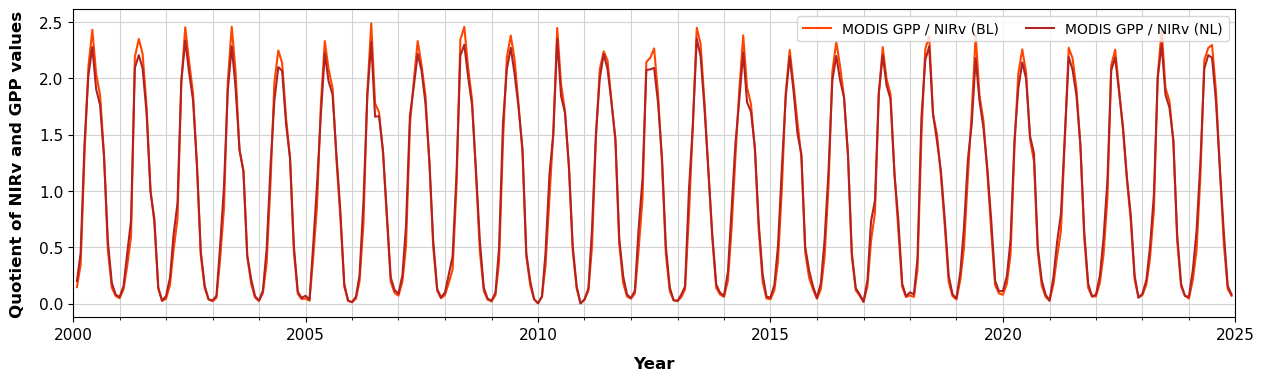

In [43]:
# plot result
fig, ax = plt.subplots(figsize=(15,4))
ax.plot('time', 'Quotient', data=df_nirv_modis_BL_shift, color='orangered', linewidth=1.5, linestyle='-', label="MODIS GPP / NIRv (BL)")
ax.plot('time', 'Quotient', data=df_nirv_modis_NL_shift, color='firebrick', linewidth=1.5, linestyle='-', label="MODIS GPP / NIRv (NL)")
ax.xaxis.set_major_locator(mdates.YearLocator(5))
ax.xaxis.set_minor_locator(mdates.YearLocator(1))
ax.tick_params(axis='both', labelsize=11)
ax.set_ylabel('Quotient of NIRv and GPP values', fontsize=12, weight='bold', labelpad=10)
ax.set_xlabel('Year', fontsize=12, weight='bold', labelpad=10)
ax.set_xlim(datetime(2000, 1, 1), datetime(2025, 1, 1))
ax.grid(True, which='both', color='lightgrey')
ax.legend(loc=1, fontsize=10,  bbox_to_anchor=(1.0, 1.0), ncol = 2)

In [44]:
# look at the means of the quotients
print(f"Mean of the quotient shifted NIRv / MODIS GPP (BL forest): {df_nirv_modis_BL_shift["Quotient"].mean()}")
print(f"Mean of the quotient shifted NIRv / MODIS GPP (NL forest): {df_nirv_modis_NL_shift["Quotient"].mean()}")

Mean of the quotient shifted NIRv / MODIS GPP (BL forest): 0.9814078714797044
Mean of the quotient shifted NIRv / MODIS GPP (NL forest): 0.9919972398913679
